# Identity

Name : Gabriel Reyes

Batch : FTDS-004


## Objective

Membuat Model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang ada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
# evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# Display
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
#save model
import joblib
import json

# Query SQL

In [2]:
# SELECT limit_balance, 
# CAST(sex AS INT64) AS sex, 
# CAST(education_level AS INT64) AS education_level, 
# CAST(marital_status AS INT64) AS marital_status,
# age, 
# pay_0, 
# pay_2, 
# pay_3, 
# pay_4, 
# CAST(pay_5 AS FLOAT64) AS pay_5, 
# CAST(pay_6 AS FLOAT64) AS pay_6, 
# bill_amt_1, 
# bill_amt_2, 
# bill_amt_3, 
# bill_amt_4, 
# bill_amt_5, 
# bill_amt_6, 
# pay_amt_1, 
# pay_amt_2, 
# pay_amt_3, 
# pay_amt_4, 
# pay_amt_5, 
# pay_amt_6, 
# CAST(default_payment_next_month AS INT64) AS default_payment_next_month
# FROM `bigquery-public-data.ml_datasets.credit_card_default` 
# LIMIT 7992

# Data Loading & Overview

In [3]:
missing_mark = ['n/a','na','---','?',' ?','? ','nan','no','NaN']
df = pd.read_csv('dataset.csv', na_values=missing_mark)
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


In [4]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [5]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [6]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

**Description for each column**

> limit_balance : Amount of given credit in NT dollars (includes individual and family/supplementary credit)

> sex : Gender (1=male, 2=female)

> education_level : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

> marital_status : Marital status (1=married, 2=single, 3=others)

> age : Age in years

> pay_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

> pay_2 : Repayment status in August, 2005 (scale same as above)

> pay_3 : Repayment status in July, 2005 (scale same as above)

> pay_4 : Repayment status in June, 2005 (scale same as above)	

> pay_5 : Repayment status in May, 2005 (scale same as above)

> pay_6 : Repayment status in April, 2005 (scale same as above)

> bill_amt_1 : Amount of bill statement in September, 2005 (NT dollar)

> bill_amt_2 : Amount of bill statement in August, 2005 (NT dollar)

> bill_amt_3 : Amount of bill statement in July, 2005 (NT dollar)

> bill_amt_4 : Amount of bill statement in June, 2005 (NT dollar)

> bill_amt_5 : Amount of bill statement in May, 2005 (NT dollar)

> bill_amt_6 : Amount of bill statement in April, 2005 (NT dollar)

> pay_amt_1 : Amount of previous payment in September, 2005 (NT dollar)

> pay_amt_2 : Amount of previous payment in August, 2005 (NT dollar)

> pay_amt_3 : Amount of previous payment in July, 2005 (NT dollar)

> pay_amt_4 : Amount of previous payment in June, 2005 (NT dollar)

> pay_amt_5 : Amount of previous payment in May, 2005 (NT dollar)

> pay_amt_6 : Amount of previous payment in April, 2005 (NT dollar)

> default_payment_next_month : Default payment (1=yes, 0=no)



## Check Duplicated Value

In [7]:
# Check for Duplicated Value
df.duplicated().sum()

1

*Conclusion for Duplicated Value*

There are 1 duplicated values within the dataset. We will handle these duplicated values later

## Check Missing Value

In [8]:
# Check for Missing Value
print(df.isna().sum())

print(f'There are {df.isna().sum().sum()} within the dataset')

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64
There are 0 within the dataset


*Conclusion for Missing Value*

There are 0 missing value within dataset



## Checking for column describe information

In [9]:
# Check the identity value column
df[['limit_balance','sex','education_level','age','default_payment_next_month']].describe()

,limit_balance,sex,education_level,age,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,35.193255,0.214165
std,125030.415472,0.488333,0.778184,9.109439,0.410311
min,10000.000000,1.000000,0.000000,21.000000,0.000000
25%,50000.000000,1.000000,1.000000,28.000000,0.000000
50%,140000.000000,2.000000,2.000000,34.000000,0.000000
75%,230000.000000,2.000000,2.000000,41.000000,0.000000
max,800000.000000,2.000000,6.000000,69.000000,1.000000


In [10]:
# Check the payment delay status
df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].describe()


,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637
std,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000


In [11]:
# Check the bill amount charged delay
df[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']].describe()


,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513
std,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981
min,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000
25%,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000
50%,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000
75%,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000
max,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000


There are negative values within the bill_amount column, which needs further analysis regarding this minus value.

My first indication is that the minus value represents the time when the customer pay more than required in the bill amount. The overpaid will covered the bill in the next month, or we could say carried over.

In [12]:
# Check the previous payment column
df[['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].describe()


,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000
mean,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518
std,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000
50%,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000
75%,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000
max,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


In order to have a better column name, I will change the column pay_0 into pay_1, since both columns are respectively related to september data

In [13]:
df = df.rename(columns={'pay_0': 'pay_1'})
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


Do check with Phik Matrix to find the correlation accross the numerical and categorical parameters

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


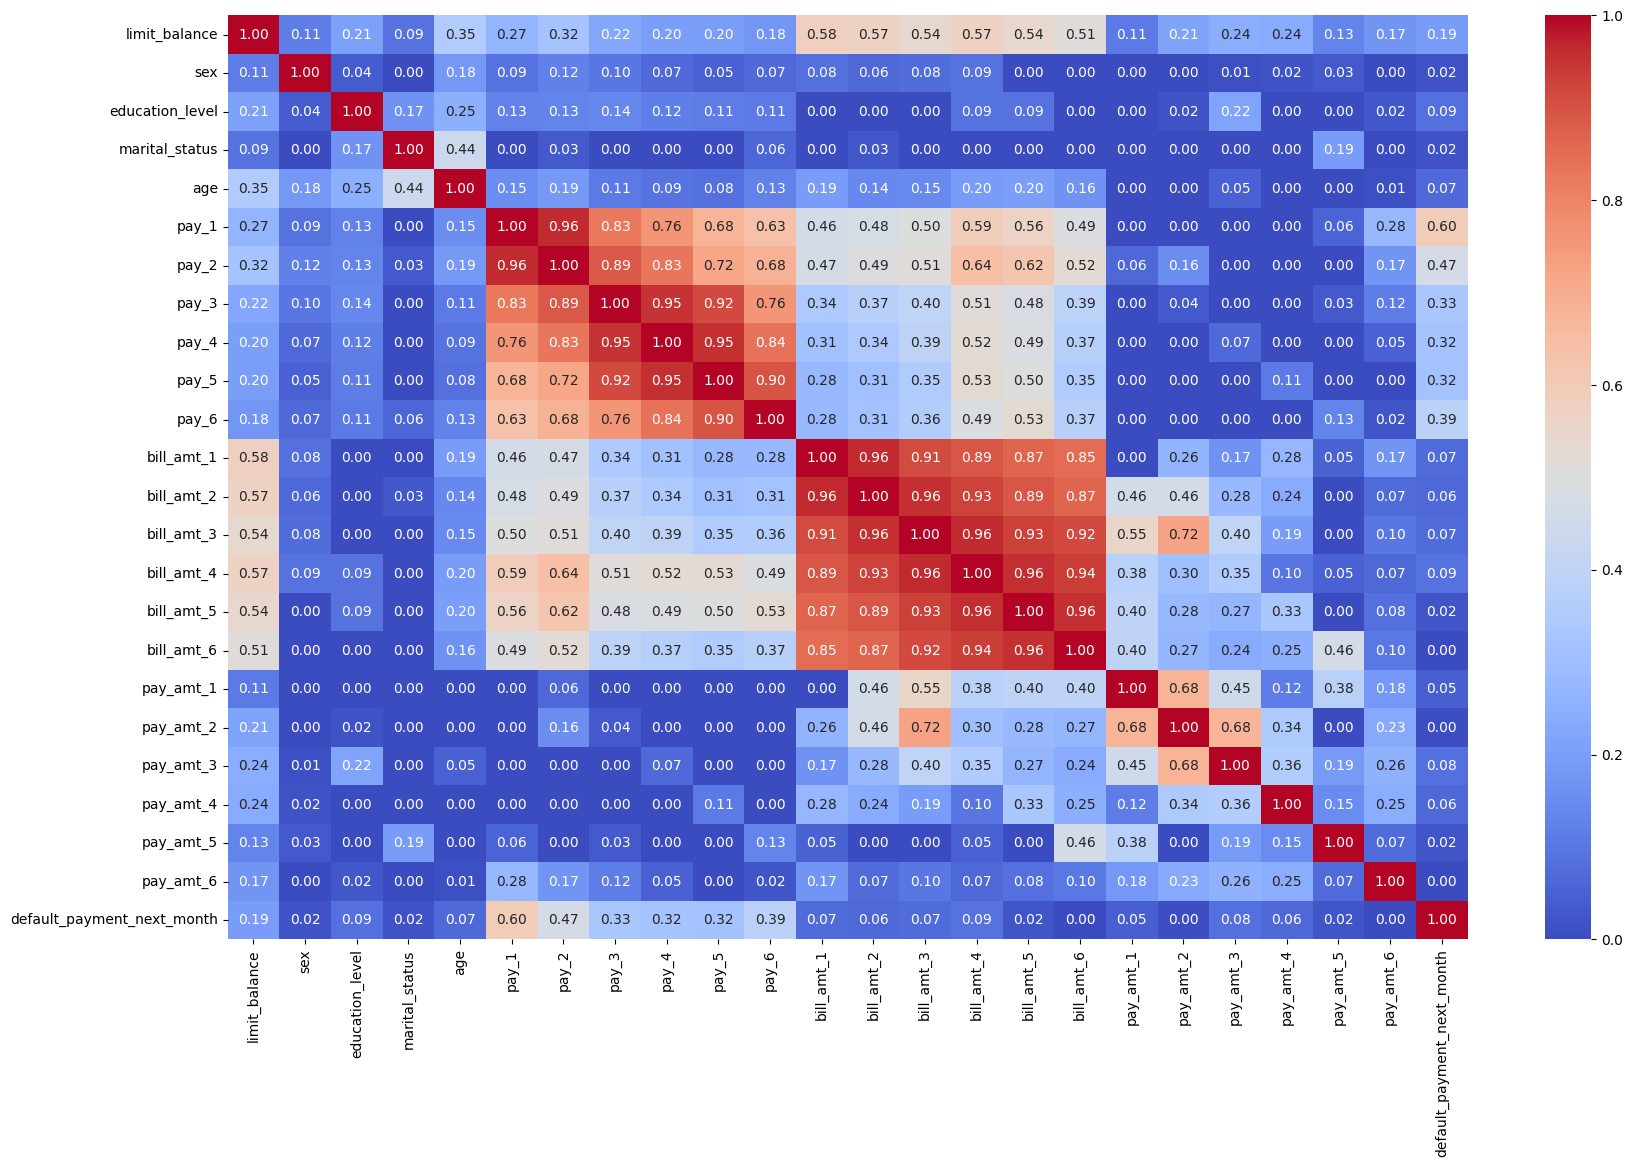

In [14]:
# Using phi-matrix to check the correlation of the categorical and the numerical features
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.phik_matrix(), cmap='coolwarm', ax=ax, annot=True, fmt='.2f')
plt.show()

**Initial Feature Selection**

Based on this plots, we might just pick the category with a phik coefficient >  0.15 :

1. limit_balance : 0.19

2. pay_1 : 0.6
 
3. pay_1 : 0.6

4. relationship : 0.41

In [15]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


### Summary for Data Loading and Overview

1. Dropping initial missing value when importing the csv file
2. There are no missing value within the dataset

# Data Cleaning

## Duplicated Value Handling

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_1                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [17]:
# Check for duplicated value
df.duplicated().sum()

1

In [18]:
# Drop duplicated value
df = df.drop_duplicates()

In [19]:
# Final Check for Duplicated Value
df.duplicated().sum()

0

The duplicated value has been handled

## Missing Value Handling

In [20]:
## Missing Value Data Handling
df.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

There are no missing values within the dataset

## Outlier Data Handling

Define Function for Outlier Detection for each column

In [21]:
def outlier_detect(dataset, column, distance=1.5):
    # Check skewness level
    print(f'Skewness level : {dataset[column].skew()}')
    # Check the IQR
    iqr = dataset[column].quantile(0.75)-dataset[column].quantile(0.25)
    iqr_multiplier = iqr*distance
    # Yielding the Upper & Lower Threshold
    upper_threshold = dataset[column].quantile(0.75) + iqr_multiplier
    lower_threshold = dataset[column].quantile(0.25) - iqr_multiplier
    # Considered Data Outlier
    outlier = dataset[(dataset[column] > upper_threshold) | (dataset[column] < lower_threshold)]
    # Check the amount of the outlier data
    print(f'Total data : {len(dataset[column])}')

    print(f'Data considered as outlier : {len(outlier)}')

    print(f'Percentage considered as outlier : {(len(outlier)/len(dataset[column]))*100}')

    return(upper_threshold, lower_threshold)

In [22]:
def outlier_detect_gaussian(dataset, column):
    # Check skewness level
    print(f'Skewness level : {dataset[column].skew()}')
    # Check the IQR
    mean = dataset[column].mean()
    std = dataset[column].std()
    # Yielding the Upper & Lower Threshold
    upper_threshold = mean + (3*std)
    lower_threshold = mean - (3*std)
    # Considered Data Outlier
    outlier = dataset[(dataset[column] > upper_threshold) | (dataset[column] < lower_threshold)]
    # Check the amount of the outlier data
    print(f'Total data : {len(dataset[column])}')

    print(f'Data considered as outlier : {len(outlier)}')

    print(f'Percentage considered as outlier : {(len(outlier)/len(dataset[column]))*100}')

    return(upper_threshold, lower_threshold)

In [23]:
def distribution_details(dataset, column) :
    # Mean, Median, Mode
    print('Mean :', dataset[column].mean())
    print('Median :', dataset[column].median())
    print('Mode :', dataset[column].mode())

    # Central Tendency
    print('Min : ', dataset[column].min())
    print('Q1 : ', np.quantile(dataset[column], 0.25))
    print('Q2 : ', np.quantile(dataset[column], 0.5))
    print('Q3 : ', np.quantile(dataset[column], 0.75))
    print('Max : ', dataset[column].max())

### Outlier Detection : limit_balance

In [24]:
outlier_detect_gaussian(df, 'limit_balance')

Skewness level : 1.0006047564306488
Total data : 2964
Data considered as outlier : 7
Percentage considered as outlier : 0.23616734143049933


(538506.0531156816, -211792.1529807289)

In [25]:
distribution_details(df,'limit_balance')

Mean : 163356.95006747637
Median : 140000.0
Mode : 0    50000.0
Name: limit_balance, dtype: float64
Min :  10000.0
Q1 :  50000.0
Q2 :  140000.0
Q3 :  230000.0
Max :  800000.0


Conclusion :

Since there are only 7 datasets within the limit_balance column, the outlier value is not affecting the distribution of the limit_balance significantly.

# EDA

In [26]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


## Data Exploration

Age to default_payment_next_month

Text(0.5, 1.0, 'Average Age Customer')

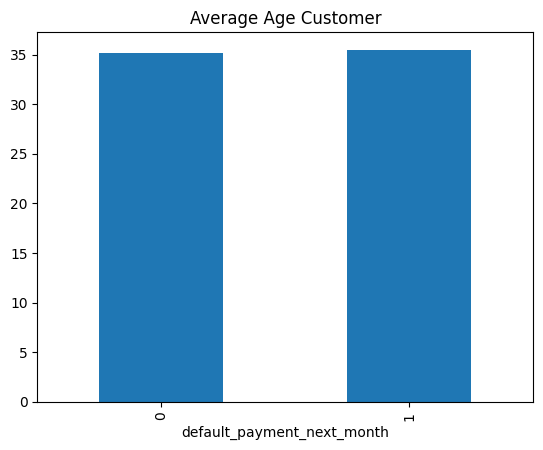

In [27]:
df.groupby('default_payment_next_month')['age'].mean().plot(kind='bar')
plt.title('Average Age Customer')

On both the 0 (not default) and 1 (default) customers are relatively aged the same, around 35 years old.

Sex to default_payment_next_month

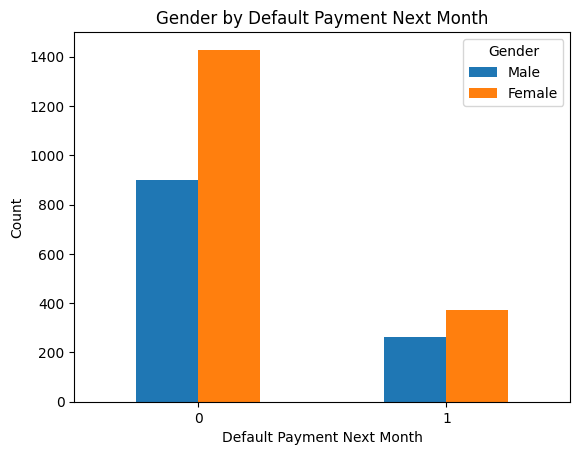

In [28]:
df_viz= df.groupby('default_payment_next_month')['sex'].value_counts().unstack()
df_viz.columns = ['Male','Female']
df_viz.plot(kind='bar')
plt.title('Gender by Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right')

On both the 0 (not default) and 1 (default) the customers are primarily filled by the Male

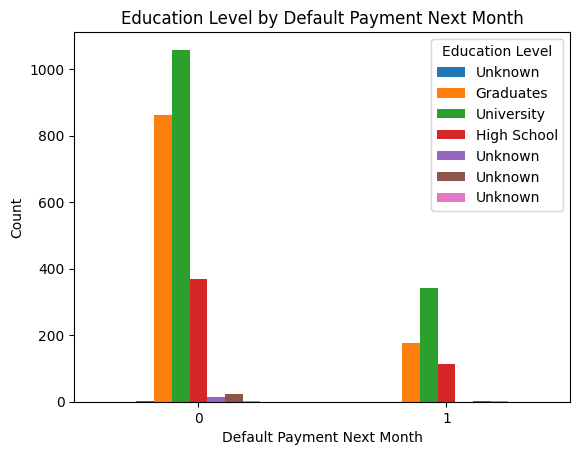

In [29]:
df_viz = df.groupby('default_payment_next_month')['education_level'].value_counts().unstack()
df_viz.columns = ['Unknown','Graduates','University','High School','Unknown','Unknown','Unknown']
df_viz.plot(kind='bar')
plt.title('Education Level by Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Education Level', loc='upper right')

On both the 0 (not default) and 1 (default), the most significant Education Level are mostly occupied by the University Education Level.

## Utilization Rate 

Checking the correlation of the limit_balance and the bill_amount charged from May - September. We will call this column as **Utilization Rate**

In [30]:
df[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']].describe()

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,52135.889001,50666.241228,48256.032726,44104.558367,40969.898448,39786.491228
std,72334.536115,70790.828470,68151.445516,61912.600106,58276.878626,57308.498646
min,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000
25%,3979.750000,3403.500000,3311.750000,2585.000000,1974.500000,1433.000000
50%,24325.000000,23169.000000,21549.500000,19895.000000,18819.500000,18511.500000
75%,69863.000000,67836.250000,63034.500000,58638.500000,53414.500000,52297.000000
max,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000


In [31]:
# Creating Utilization Rate
# utilization Rate = Average of Bill_Amount / Limit Balance

bill_amt = (df['bill_amt_1'] + df['bill_amt_2'] + df['bill_amt_3'] + df['bill_amt_4'] + df['bill_amt_5'] + df['bill_amt_6'])/6

df['utilization_rate'] = bill_amt/df['limit_balance'] *100

In [32]:
df[['limit_balance','utilization_rate']].head()

,limit_balance,utilization_rate
0,80000.0,53.896042
1,200000.0,24.927250
2,20000.0,47.047500
3,260000.0,10.053590
4,150000.0,92.227444


## Repayment Status

Checking the trend of the repayment status by making a column that have the average value of the repayment status

In [33]:
repay_status = df['pay_1'] + df['pay_2'] + df['pay_3'] + df['pay_4'] +df['pay_5'] + df['pay_6']

df['repayment_status'] = repay_status/6

In [34]:
df[['limit_balance','utilization_rate','repayment_status']].describe()

,limit_balance,utilization_rate,repayment_status
count,2964.000000,2964.000000,2964.000000
mean,163356.950067,37.876535,-0.153565
std,125049.701016,34.366819,0.978040
min,10000.000000,-14.985000,-2.000000
25%,50000.000000,3.658611,-0.833333
50%,140000.000000,30.700167,0.000000
75%,230000.000000,68.604638,0.000000
max,800000.000000,137.881333,5.500000


## Pay Amount

Check the ratio of pay amount with bill charged

In [35]:
df[df['utilization_rate'] == 0]

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,utilization_rate,repayment_status
2751,300000.0,2,4,1,31.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-2.000000
2763,300000.0,1,1,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,-2.000000
2766,280000.0,1,1,1,63.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-2.000000
2767,500000.0,1,1,1,35.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,-2.000000
2768,180000.0,1,1,2,34.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,20000.0,1,3,1,28.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-1.500000
2907,40000.0,1,3,1,56.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,-1.500000
2908,360000.0,2,3,1,29.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,-1.500000
2909,200000.0,2,3,1,47.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-1.500000


Since the value 0 in utilization rate may distort the calculation in the payment_status (*give inf value*), I will drop this column

In [36]:
# Dropping index that has utilization rate == 0
df.drop(df[df['utilization_rate'] == 0].index, inplace=True)

In [37]:
# Creating Pay Amount Column
bill_amt = (df['bill_amt_1'] + df['bill_amt_2'] + df['bill_amt_3'] + df['bill_amt_4'] + df['bill_amt_5'] + df['bill_amt_6'])/6
pay_amt = (df['pay_amt_1'] + df['pay_amt_2'] + df['pay_amt_3'] + df['pay_amt_4'] + df['pay_amt_5'] + df['pay_amt_6'])/6

df['payment_rate'] = pay_amt/bill_amt *100


In [38]:
df[['limit_balance','utilization_rate','payment_rate']].describe()

,limit_balance,utilization_rate,payment_rate
count,2878.000000,2878.000000,2878.000000
mean,161650.451703,39.008356,47.142506
std,124971.822134,34.237662,810.941245
min,10000.000000,-14.985000,-16179.687500
25%,50000.000000,4.704334,4.257397
50%,135000.000000,32.551389,9.106322
75%,230000.000000,69.631923,56.396201
max,800000.000000,137.881333,39015.887850


In [39]:
df[df['payment_rate'] <0]

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,utilization_rate,repayment_status,payment_rate
2133,300000.0,2,1,1,42.0,1.0,-2.0,-2.0,-2.0,-1.0,...,0.0,694.0,0.0,694.0,0.0,0.0,0,-0.016667,-0.500000,-462.666667
2134,150000.0,1,1,1,36.0,1.0,-2.0,-2.0,-2.0,-1.0,...,0.0,0.0,0.0,1580.0,782.0,638.0,0,-0.123778,-1.166667,-269.299820
2154,60000.0,1,2,2,37.0,1.0,-2.0,-2.0,-1.0,-1.0,...,0.0,0.0,1950.0,0.0,1000.0,0.0,0,-0.157222,-1.000000,-521.201413
2168,140000.0,1,1,2,28.0,0.0,-1.0,-1.0,0.0,-1.0,...,4340.0,5491.0,2013.0,1510.0,18.0,89898.0,0,-3.828333,-0.666667,-321.133155
2607,220000.0,2,1,1,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,2337.0,58.0,0.0,0.0,3500.0,0,-0.113333,-2.000000,-394.050802
2609,350000.0,2,1,2,33.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,940.0,0,-0.000571,-2.000000,-7833.333333
2617,30000.0,1,2,2,35.0,2.0,2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,1620.0,900.0,1,-1.762222,-0.666667,-79.445145
2652,230000.0,2,2,2,34.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,1518.0,1000.0,0.0,0.0,0.0,0.0,0,-0.424638,-2.000000,-42.969283
2660,260000.0,2,2,2,26.0,-1.0,-1.0,-2.0,-2.0,-2.0,...,288.0,1236.0,316.0,316.0,316.0,316.0,0,-0.293077,-1.666667,-60.979878
2670,160000.0,2,3,1,46.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,380.0,2000.0,0.0,101170.0,0.0,0.0,0,-0.066667,-2.000000,-16179.687500


In [40]:
# Dropping index that has payment_rate < 0
df.drop(df[df['payment_rate'] <= 0].index, inplace=True)

## Final EDA

We add additional column :

> Utilization Rate : Ratio between bill charged to limit balance

> Payment Rate : Ratio between amount paid to bill charged

> Repayment Status : Average Value of the Repayment Status

In [41]:
df[['limit_balance','utilization_rate','payment_rate','repayment_status']].describe()

,limit_balance,utilization_rate,payment_rate,repayment_status
count,2806.000000,2806.000000,2806.000000,2806.000000
mean,161906.628653,39.829284,57.817412,-0.109527
std,125211.976466,34.094718,746.943772,0.883164
min,10000.000000,0.011065,0.242613,-2.000000
25%,50000.000000,5.178568,4.374590,-0.666667
50%,140000.000000,34.288754,9.910964,0.000000
75%,230000.000000,70.248667,58.335271,0.000000
max,800000.000000,137.881333,39015.887850,5.166667


# Feature Engineering

Initial Feature :

**pay_1, utilization_rate, repayment_status, payment_rate**

In [42]:
df_cleaned = df.copy()
df_cleaned.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,utilization_rate,repayment_status,payment_rate
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1,53.896042,0.000000,3.560481
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0,24.927250,0.000000,5.125916
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,4641.0,1019.0,900.0,0.0,1500.0,0.0,1,47.047500,0.000000,14.276352
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0,10.053590,0.000000,14.168941
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0,92.227444,-0.166667,38.944783


interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month', 'utilization_rate', 'repayment_status', 'payment_rate']


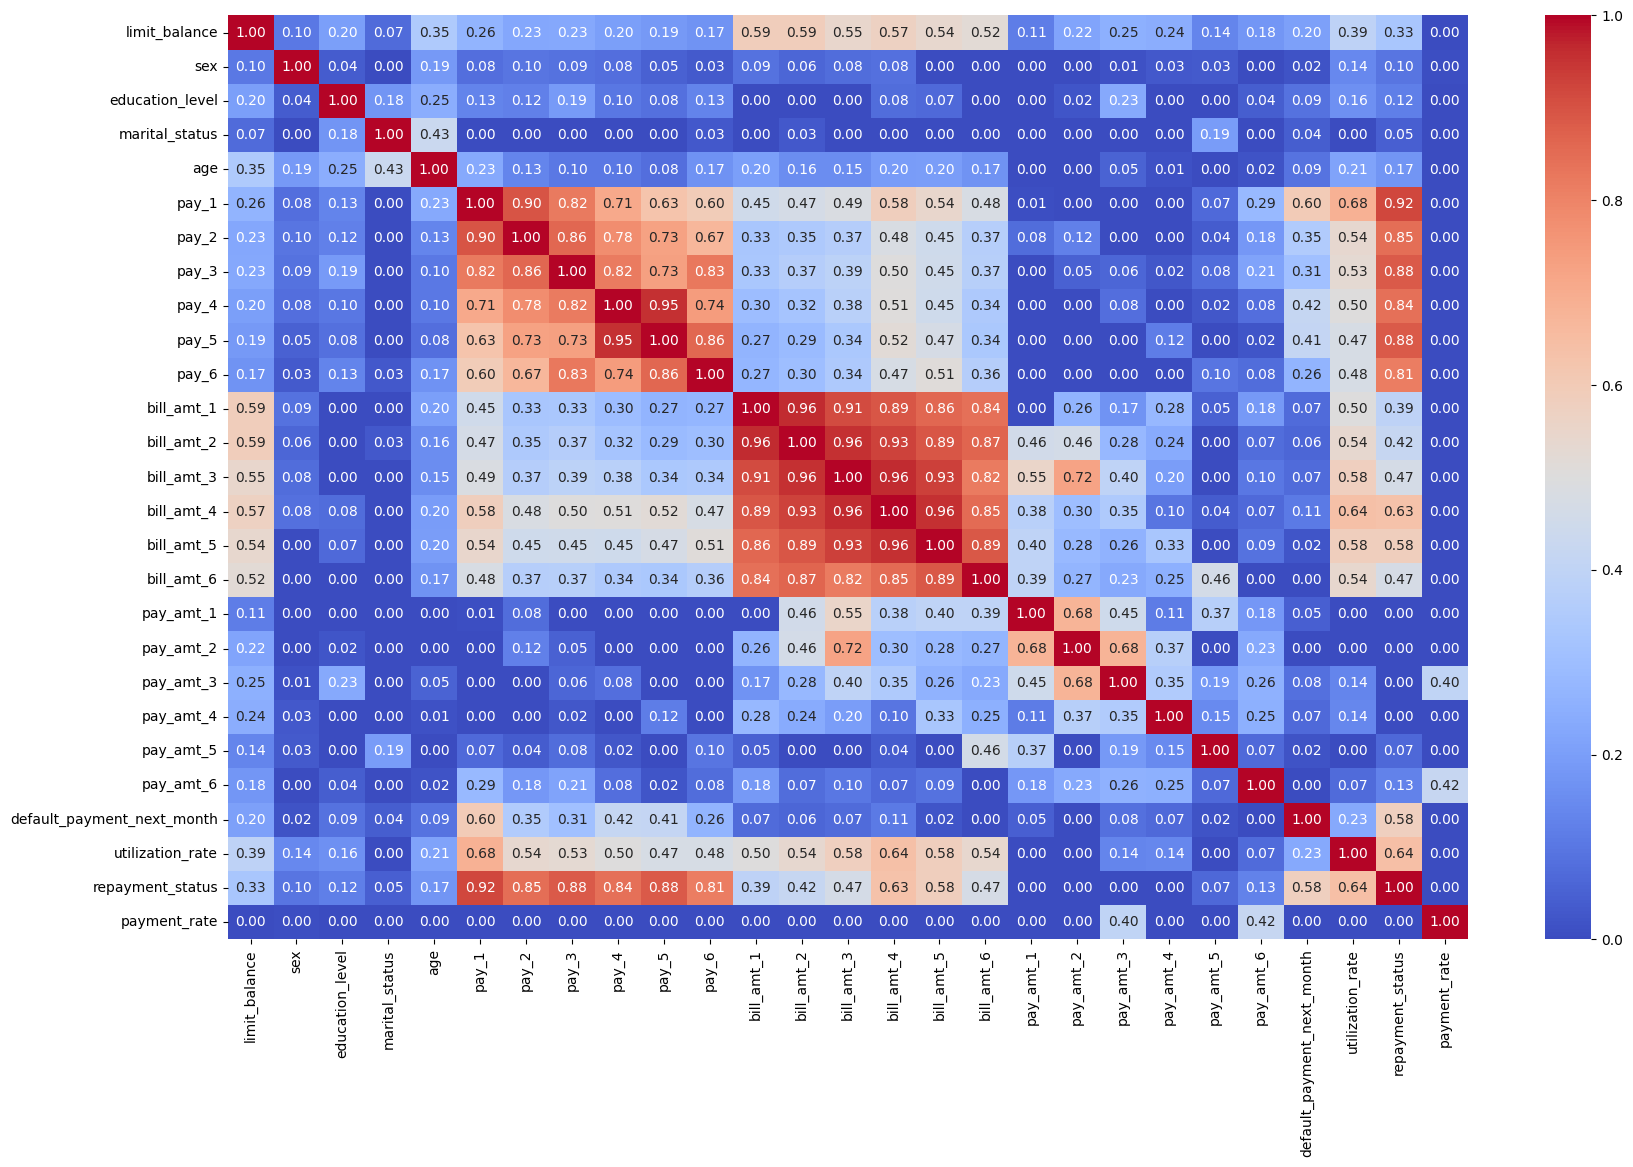

In [43]:
# Using phi-matrix to check the correlation of the categorical and the numerical features
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_cleaned.phik_matrix(), cmap='coolwarm', ax=ax, annot=True, fmt='.2f')
plt.show()

Based on this Phik Matrix, I will focus on these features :

> pay_1

> Utilization Rate

> Repayment Status

interval columns not set, guessing: ['pay_1', 'utilization_rate', 'repayment_status', 'default_payment_next_month']


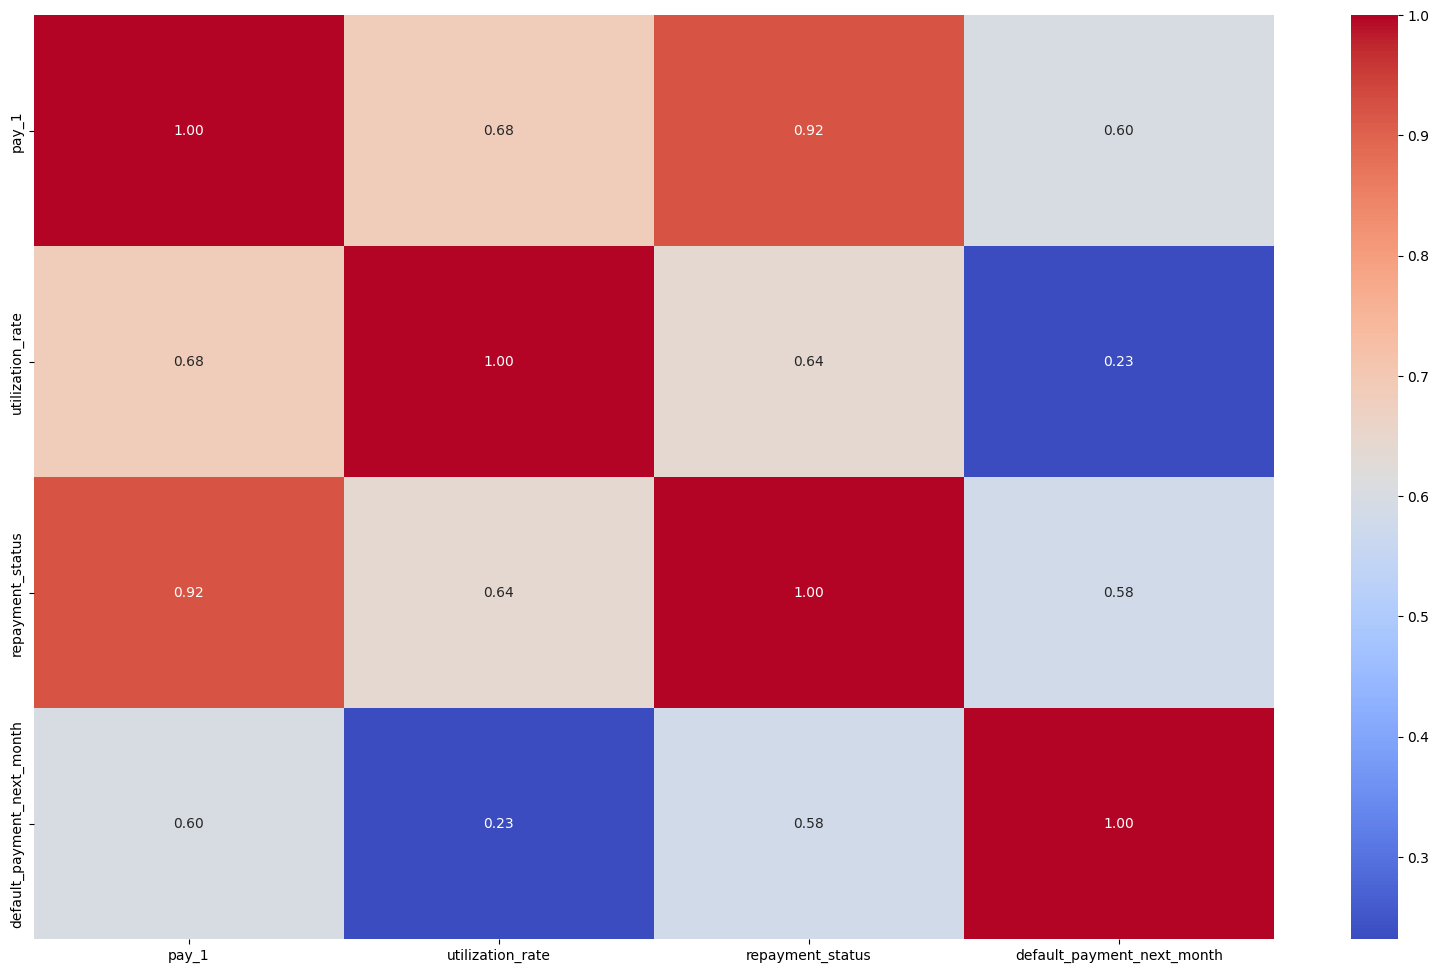

In [44]:
# Using phi-matrix to check the correlation of the categorical and the numerical features
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_cleaned[['pay_1','utilization_rate','repayment_status','default_payment_next_month']].phik_matrix(), cmap='coolwarm', ax=ax, annot=True, fmt='.2f')
plt.show()

In [45]:
feature_init = ['pay_1', 'utilization_rate', 'repayment_status']
feature_target = feature_init + ['default_payment_next_month']

## Cardinality Handling

### Pay_1 & Repayment Status column handling

**Pay_1 and Repayment Status** are both columns that contain the summary of the obedience of the customer towards credit payment. I will classify their marks on repayment status into several groups.

<= 0 : Good Customer

0 < x <= 1 : Early Warned Customer

1 < x <= 2 : Medium Warned Customer

x > 2 : Highly Warned Customer


In [46]:
# Mapping the repayment status to both repayment_status and pay_1 column

def map_to_payment(x):
    if x <= 0:
        return 'Good Customer'
    elif 0 < x <= 1:
        return 'Early Warned Customer'
    elif 1 < x <= 2:
        return 'Medium Warned Customer'
    elif x > 2:
        return 'Highly Warned Customer'
    else:
        return 'Other'

def map_to_overall(x):
    if x <= 0:
        return 'Good Overall'
    elif 0 < x <= 1:
        return 'Early Warned Overall'
    elif 1 < x <= 2:
        return 'Medium Warned Overall'
    elif x > 2:
        return 'Highly Warned Overall'
    else:
        return 'Other'

df_cleaned['repayment_status_group'] = df_cleaned['repayment_status'].apply(map_to_overall)
df_cleaned['pay_1_group'] = df_cleaned['pay_1'].apply(map_to_payment)

#### Visualization

default_payment_next_month to repayment_status_group

In [47]:
viz_1 = df_cleaned.groupby('default_payment_next_month')['repayment_status_group'].value_counts().unstack()
viz_1

repayment_status_group,Early Warned Overall,Good Overall,Highly Warned Overall,Medium Warned Overall
default_payment_next_month,,,,
0,278,1870,9,63
1,182,239,29,136


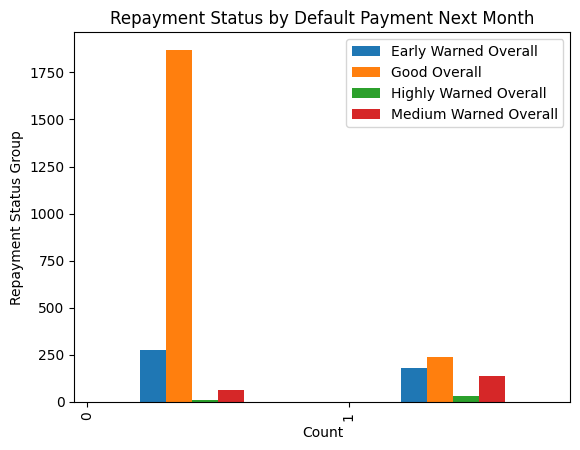

In [48]:
viz_1.plot(kind='bar', stacked=False, position=-0.5, width=0.4)
plt.title('Repayment Status by Default Payment Next Month')
plt.xlabel('Count')
plt.ylabel('Repayment Status Group')
plt.legend()
plt.show()

default_payment_next_month to pay_1_group

In [49]:
viz_1 = df_cleaned.groupby('default_payment_next_month')['pay_1_group'].value_counts().unstack()
viz_1

pay_1_group,Early Warned Customer,Good Customer,Highly Warned Customer,Medium Warned Customer
default_payment_next_month,,,,
0,195,1950,8,67
1,99,279,26,182


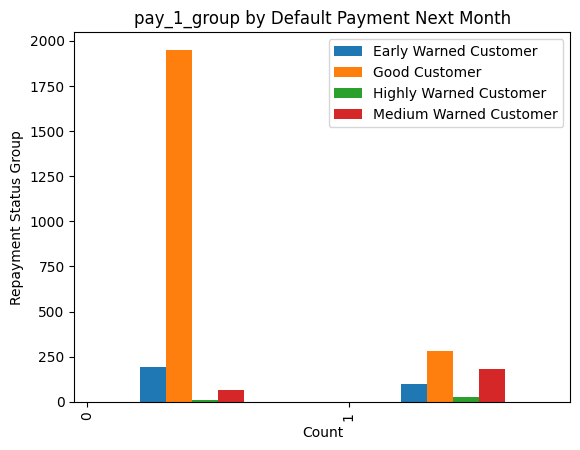

In [50]:
viz_1.plot(kind='bar', stacked=False, position=-0.5, width=0.4)
plt.title('pay_1_group by Default Payment Next Month')
plt.xlabel('Count')
plt.ylabel('Repayment Status Group')
plt.legend()
plt.show()

### Utilization Rate Column Handling

In terms of credit scoring, there is a terms called credit utilization rate (CUR). To maintain a healthy credit score, it’s important to keep your credit utilization rate (CUR) low. The general rule of thumb has been that you don’t want your CUR to exceed 30%, but increasingly financial experts are recommending that you don’t want to go above 10% if you really want an excellent credit score.

So then, I will classify the utilization rate into several categories :

<= 10% : Excellent Utilization
 
10 < x <= 30 : Good Utilization

30 < x < 100 : Early Warning Utilization

x >= 100 : High Warning Utilization


https://www.cnbc.com/select/what-is-a-good-credit-utilization-ratio/#:~:text=To%20maintain%20a%20healthy%20credit,want%20an%20excellent%20credit%20score.



In [51]:
# Mapping the repayment status to both repayment_status and pay_1 column

def map_to_utilization(x):
    if x <= 10:
        return 'Excellent Utilization'
    elif 10 < x <= 30:
        return 'Good Utilization'
    elif 30 < x < 100:
        return 'Early Warning Utilization'
    elif x >= 100:
        return 'High Warning Utilization'
    else:
        return 'Other'

df_cleaned['utilization_group'] = df_cleaned['utilization_rate'].apply(map_to_utilization)

#### Visualization

In [52]:
viz_1 = df_cleaned.groupby('default_payment_next_month')['utilization_group'].value_counts().unstack()
viz_1

utilization_group,Early Warning Utilization,Excellent Utilization,Good Utilization,High Warning Utilization
default_payment_next_month,,,,
0,1046,759,370,45
1,378,131,58,19


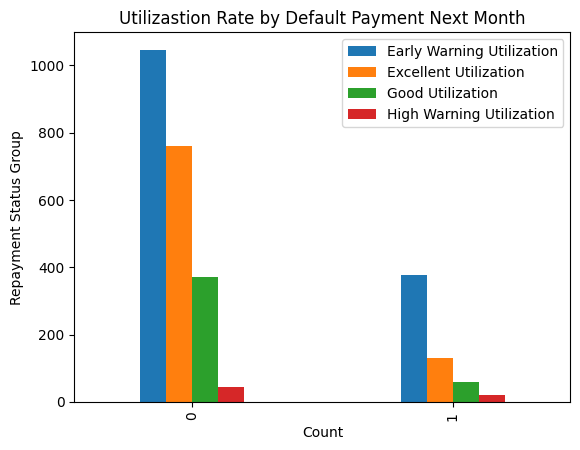

In [53]:
viz_1.plot(kind='bar', stacked=False, position=+0.5, width=0.4)
plt.title('Utilizastion Rate by Default Payment Next Month')
plt.xlabel('Count')
plt.ylabel('Repayment Status Group')
plt.legend()
plt.show()

In [54]:
df_cleaned[['repayment_status','repayment_status_group','pay_1','pay_1_group','utilization_rate','utilization_group']].head()

,repayment_status,repayment_status_group,pay_1,pay_1_group,utilization_rate,utilization_group
0,0.000000,Good Overall,0.0,Good Customer,53.896042,Early Warning Utilization
1,0.000000,Good Overall,0.0,Good Customer,24.927250,Good Utilization
2,0.000000,Good Overall,0.0,Good Customer,47.047500,Early Warning Utilization
3,0.000000,Good Overall,0.0,Good Customer,10.053590,Good Utilization
4,-0.166667,Good Overall,0.0,Good Customer,92.227444,Early Warning Utilization


In [55]:
df_cleaned.groupby('default_payment_next_month')[['repayment_status_group','pay_1_group','utilization_group']].value_counts()

default_payment_next_month  repayment_status_group  pay_1_group             utilization_group        
0                           Good Overall            Good Customer           Early Warning Utilization    793
                                                                            Excellent Utilization        632
                                                                            Good Utilization             310
                            Early Warned Overall    Good Customer           Early Warning Utilization    117
                            Good Overall            Early Warned Customer   Excellent Utilization         86
                                                                                                        ... 
1                           Early Warned Overall    Early Warned Customer   Good Utilization               1
                                                    Highly Warned Customer  Early Warning Utilization      1
                          

<Axes: xlabel='default_payment_next_month,repayment_status_group'>

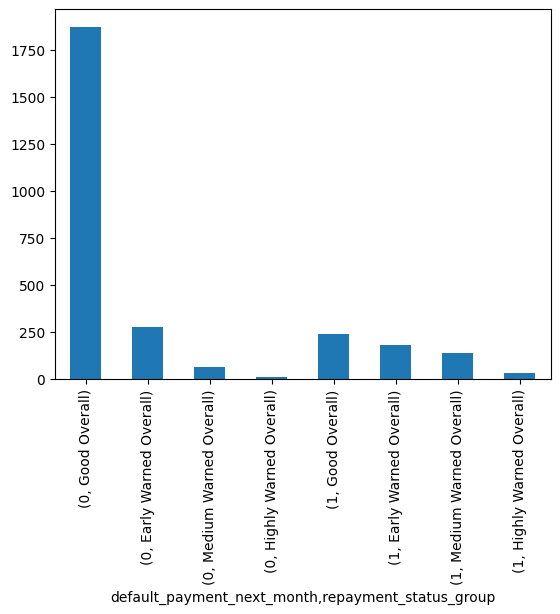

In [56]:
# Check Correlation between Default and Repayment_status_group
df_cleaned.groupby('default_payment_next_month')[['repayment_status_group']].value_counts().plot(kind='bar')

<Axes: xlabel='default_payment_next_month,utilization_group'>

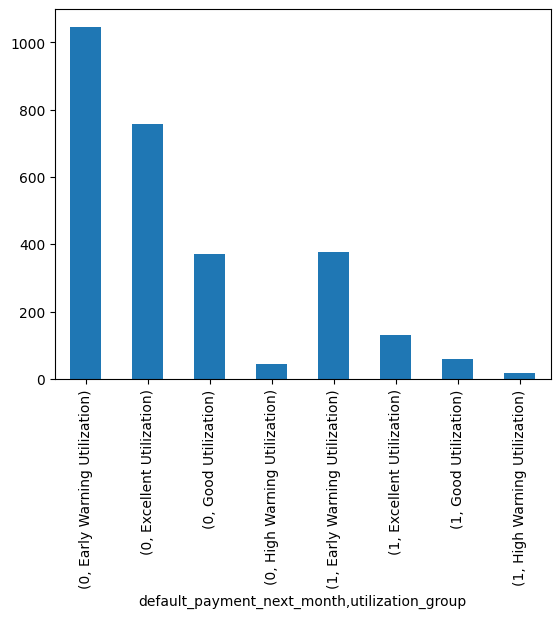

In [57]:
# Check Correlation between Default and Repayment_status_group
df_cleaned.groupby('default_payment_next_month')[['utilization_group']].value_counts().plot(kind='bar')

Initial Drop for Column


In [58]:
df_cleaned_init = df_cleaned.copy()
df_cleaned_init = df_cleaned_init[['repayment_status_group','pay_1_group','utilization_group','default_payment_next_month']]
df_cleaned_init.head()

,repayment_status_group,pay_1_group,utilization_group,default_payment_next_month
0,Good Overall,Good Customer,Early Warning Utilization,1
1,Good Overall,Good Customer,Good Utilization,0
2,Good Overall,Good Customer,Early Warning Utilization,1
3,Good Overall,Good Customer,Good Utilization,0
4,Good Overall,Good Customer,Early Warning Utilization,0


In [59]:
print(df_cleaned_init['repayment_status_group'].unique())
print(df_cleaned_init['pay_1_group'].unique())
print(df_cleaned_init['utilization_group'].unique())

['Good Overall' 'Early Warned Overall' 'Medium Warned Overall'
 'Highly Warned Overall']
['Good Customer' 'Medium Warned Customer' 'Early Warned Customer'
 'Highly Warned Customer']
['Early Warning Utilization' 'Good Utilization' 'Excellent Utilization'
 'High Warning Utilization']


# Model Building

## Train Test Data Split

In [60]:
X = df_cleaned_init.drop('default_payment_next_month', axis=1)
y = df_cleaned_init['default_payment_next_month']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=153,stratify=y)

In [62]:
# Checking Shape of the train test data split
col = [X_train, X_test, y_train, y_test]

for i in col :
    print(f'{i.shape}')

(2244, 3)
(562, 3)
(2244,)
(562,)


## Pipeline

Algroithm will be used within this models are :

> Logistic Regression

> SVM

> Decision Tree

> Random Forrest

> KNN

> Naive Bayes

> AdaBoost

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Preprocessor

In [64]:
ordinal_features = ['pay_1_group', 'utilization_group']
ord_transformer = OrdinalEncoder() 

categorical_features = ['repayment_status_group']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("ord",ord_transformer,ordinal_features)
    ]
)

#### Pipeline for **Logistic Regression**

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

#### Pipeline for **SVM**


In [66]:
from sklearn.svm import SVC
svc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

#### Pipeline for **Decision Tree**

In [67]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

#### Pipeline for **Random Forrest**

In [68]:
from sklearn.ensemble import RandomForestClassifier
rand_for = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)

#### Pipeline for **KNN**


In [69]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())]
)


#### Pipeline for **Naive Bayes**


In [70]:
from sklearn.naive_bayes import GaussianNB

naive = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())]
)


#### Pipeline for **AdaBoost**

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", AdaBoostClassifier())]
)

## Cross Validation

Since the class within dataset is imbalance, we will do **Stratified K-Fold Cross Validation Technique** which specifically designed for datasets with class imbalance.

Stratified K-Fold Cross Validation takes into account the class distribution of the data, which helps to improve the performance estimate of the model.

We are going to find the scoring based on the "recall" value which emphasize more on false negative condition.

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
skfold=StratifiedKFold(n_splits=5)
# checking cross validation score
cv_log_model = cross_val_score(logreg, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svc, X_train, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dec_tree, X_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rand_for, X_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn, X_train, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(naive, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.35106383 0.31914894 0.34042553 0.4787234  0.48387097]
recall - Mean - Cross Validation :  0.394646533973919
recall - Std - Cross Validation  :  0.07151108465151072
recall - Range of Test-Set       :  0.3231354493224083 - 0.46615761862542976
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.46808511 0.35106383 0.39361702 0.5        0.50537634]
recall - Mean - Cross Validation :  0.443628460306566
recall - Std - Cross Validation  :  0.06108687916891046
recall - Range of Test-Set       :  0.3825415811376555 - 0.5047153394754764
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.41489362 0.31914894 0.35106383 0.42553191 0.49462366]
recall - Mean - Cross Validation :  0.40105239075726384
recall - Std - Cross Validation  :  0.06124286147888522
recall - Range of Test-Set       :  0.3398095292783786 - 0.4622952522361491
-----------------------------

### Cross Validation Conclusion 

KNN model shows the best performance in the **recall score** compared to the other models. 

**KNN Model Cross Validation Recall Scores Mean is 45.21%**

## Model Running

### Logistic Regression

Model score: 0.836
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       445
           1       0.66      0.44      0.53       117

    accuracy                           0.84       562
   macro avg       0.76      0.69      0.71       562
weighted avg       0.82      0.84      0.82       562

Confusion Matrix      : 


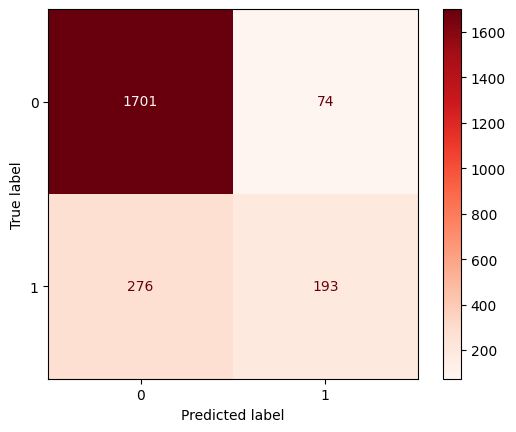

In [73]:
# Fit the logreg function to train dataset
logreg.fit(X_train, y_train)
print("Model score: %.3f" % logreg.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

from sklearn.metrics import classification_report

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_train, y_train, cmap='Reds'))

### Support Vector Machine (SVM)

Model score: 0.827
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       445
           1       0.61      0.46      0.53       117

    accuracy                           0.83       562
   macro avg       0.74      0.69      0.71       562
weighted avg       0.81      0.83      0.82       562

Confusion Matrix      : 


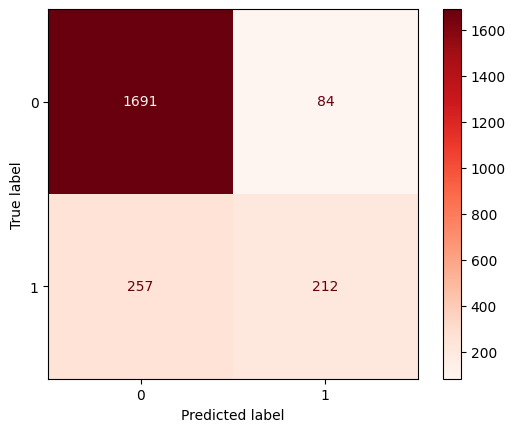

In [74]:
# Fit the SVM function to train dataset
svc.fit(X_train, y_train)
print("Model score: %.3f" % svc.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_train, y_train, cmap='Reds'))

### Decision Tree

Model score: 0.829
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       445
           1       0.62      0.46      0.53       117

    accuracy                           0.83       562
   macro avg       0.74      0.69      0.71       562
weighted avg       0.82      0.83      0.82       562

Confusion Matrix      : 


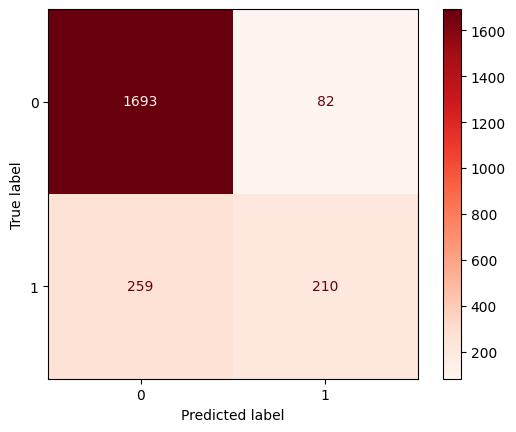

In [75]:
# Fit the dec_tree function to train dataset
dec_tree.fit(X_train, y_train)
print("Model score: %.3f" % dec_tree.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = dec_tree.predict(X_train)
pred_test = dec_tree.predict(X_test)

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dec_tree, X_train, y_train, cmap='Reds'))

### Random Forrest

Model score: 0.827
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       445
           1       0.61      0.46      0.53       117

    accuracy                           0.83       562
   macro avg       0.74      0.69      0.71       562
weighted avg       0.81      0.83      0.82       562

Confusion Matrix      : 


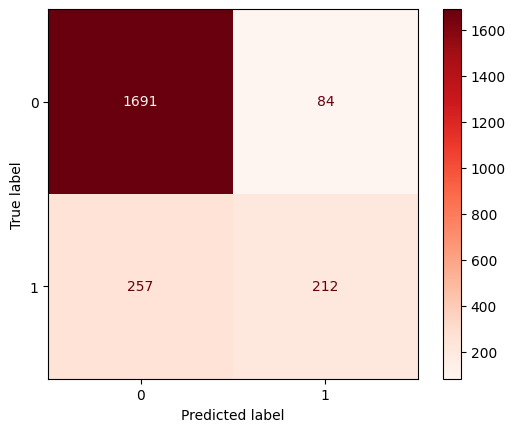

In [76]:
# Fit the rand_for function to train dataset
rand_for.fit(X_train, y_train)
print("Model score: %.3f" % rand_for.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = rand_for.predict(X_train)
pred_test = rand_for.predict(X_test)

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rand_for, X_train, y_train, cmap='Reds'))

### KNN

Model score: 0.788
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       445
           1       0.49      0.57      0.53       117

    accuracy                           0.79       562
   macro avg       0.69      0.71      0.70       562
weighted avg       0.80      0.79      0.79       562

Confusion Matrix      : 


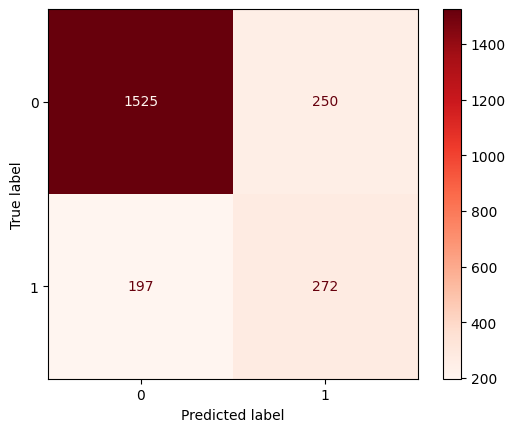

In [77]:
# Fit the knn function to train dataset
knn.fit(X_train, y_train)
print("Model score: %.3f" % knn.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train, cmap='Reds'))

### Naive Bayes

Model score: 0.788
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       445
           1       0.49      0.57      0.53       117

    accuracy                           0.79       562
   macro avg       0.69      0.71      0.70       562
weighted avg       0.80      0.79      0.79       562

Confusion Matrix      : 


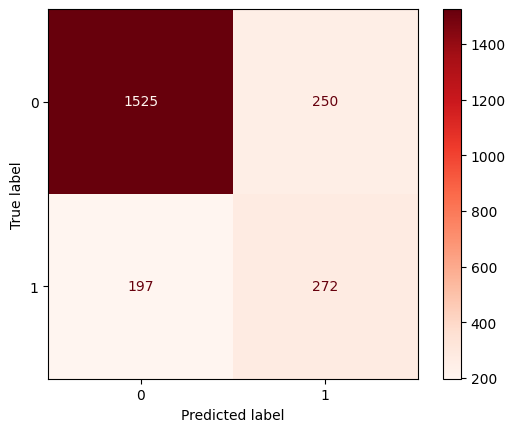

In [78]:
# Fit the naive function to train dataset
naive.fit(X_train, y_train)
print("Model score: %.3f" % naive.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = naive.predict(X_train)
pred_test = naive.predict(X_test)

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(naive, X_train, y_train, cmap='Reds'))

### AdaBoost

Model score: 0.840
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       445
           1       0.68      0.44      0.54       117

    accuracy                           0.84       562
   macro avg       0.77      0.69      0.72       562
weighted avg       0.83      0.84      0.83       562

Confusion Matrix      : 


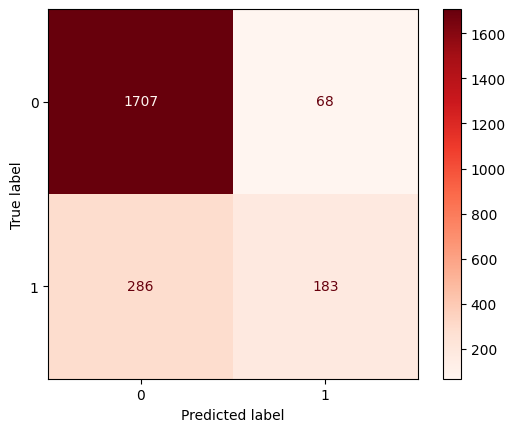

In [79]:
# Fit the ada function to train dataset
ada.fit(X_train, y_train)
print("Model score: %.3f" % ada.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = ada.predict(X_train)
pred_test = ada.predict(X_test)

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ada, X_train, y_train, cmap='Reds'))

## Hyperparemeter Tuning


Based on the Cross Validation Score, **KNN model** has the highest recall score on its default tuning compared to the other model. So then, onwards we are going to focusing the hyperparameter to the **KNN model**

### Hyperparameter using Gridsearch on KNN Model

In [80]:
# Tuning SVC Hyperparemeter
# Setting the parameter 
param_grid = {'classifier__n_neighbors': [5, 10, 15],
              'classifier__weights': ['uniform', 'distance'],
              'classifier__algorithm':['auto','ball_tree','kd_tree','brute']
              }

In [81]:
from sklearn.model_selection import GridSearchCV

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_knn.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.3f}".format(grid_knn.best_score_))
print("Test set score: {:.2f}".format(grid_knn.score(X_test, y_test)))
print("Best parameters: {}".format(grid_knn.best_params_))

Best cross-validation accuracy: 0.842
Test set score: 0.82
Best parameters: {'classifier__algorithm': 'ball_tree', 'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}


In [82]:
# Extracting the best HyperParameter Tuning for the SVC Model
grid_knn.best_params_

{'classifier__algorithm': 'ball_tree',
 'classifier__n_neighbors': 15,
 'classifier__weights': 'uniform'}

#### Hyperparameter Tuning Conclusion

Based on the Gridsearch Model Selection, the best Hyperparameter to be set on the SVC model are :

> algorithm : 'ball_tree'

> neighbors : 15

> weights : 'uniform'

### Implement the Best Parameter to the KNN Model

In [83]:
# Impelement the best parameter to the KNN Model
knn_best = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, weights ='uniform'))]
)

Model score: 0.822
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       445
           1       0.60      0.44      0.51       117

    accuracy                           0.82       562
   macro avg       0.73      0.68      0.70       562
weighted avg       0.81      0.82      0.81       562

Confusion Matrix      : 


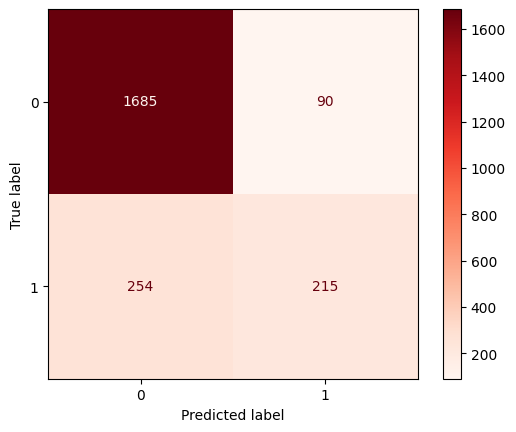

In [84]:
# Fit the svc_best function to train dataset
knn_best.fit(X_train, y_train)
print("Model score: %.3f" % knn_best.score(X_test, y_test))

# Predicting the model to X_train & X_test dataset
pred_train = knn_best.predict(X_train)
pred_test = knn_best.predict(X_test)

print('Classification Report : \n', classification_report(y_test, pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_best, X_train, y_train, cmap='Reds'))

#### KNN Tuned Result

**For class 0**

 The precision is 0.86, which means that 86% of the instances predicted as class 0 are actually of class 0. The recall is 0.92, which means that 92% of the instances of class 0 were correctly predicted as class 0. The F1-score is 0.89, which is a harmonic mean of precision and recall. The support is 445, which is the number of instances of class 0 in the dataset.

**For class 1**

The precision is 0.60, which means that 60% of the instances predicted as class 1 are actually of class 1. The recall is 0.44, which means that 44% of the instances of class 1 were correctly predicted as class 1. The F1-score is 0.51, which is a harmonic mean of precision and recall. The support is 117, which is the number of instances of class 1 in the dataset.

**The overall accuracy of the model is 0.82, which means that 82% of the instances in the dataset were correctly classified.**

Based on this classification report, it can be concluded that the model performs relatively well for class 0 with high precision and recall, but performs relatively poorly for class 1 with low precision and recall. The overall accuracy of the model is reasonable, but the class imbalance between the two classes may need to be addressed for better performance.


### Comparing Model

Comparing SVC model before Hyperparameter Tuning and after the Hyperparameter Tuning

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
skfold=StratifiedKFold(n_splits=5)
# checking cross validation score
cv_knn_model = cross_val_score(knn, X_train, y_train, cv=skfold, scoring="f1")
cv_knnbest_model = cross_val_score(knn_best, X_train, y_train, cv=skfold, scoring="f1")
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_knnbest_model],['knn_model','knn_tuned_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.53658537 0.45205479 0.48175182 0.54658385 0.56626506]
recall - Mean - Cross Validation :  0.5166481792728732
recall - Std - Cross Validation  :  0.04276805263618658
recall - Range of Test-Set       :  0.4738801266366866 - 0.5594162319090598
--------------------------------------------------
knn_tuned_model
recall - All - Cross Validation  :  [0.45833333 0.46153846 0.5248227  0.59354839 0.57831325]
recall - Mean - Cross Validation :  0.5233112260032157
recall - Std - Cross Validation  :  0.05656636328708963
recall - Range of Test-Set       :  0.46674486271612603 - 0.5798775892903053
--------------------------------------------------
best model: knn_tuned_model
cross-val mean: 0.5233112260032157


#### Comparing Conclusion

We find that the tuned KNN model yielded better results compared to the untuned KNN model in terms of **recall** score. 

Overall, there are several points that needs to be addressed from this modelling:

1. Lack of diversity in hyperparameters: If the hyperparameter space is too narrow, the tuned model may have missed important combinations of hyperparameters that would have resulted in better performance. The diversity should also considered computational expenses of the processor.

2. Unbalanced data: Since the data class is imbalanced, hyperparameter tuning may have resulted in a model that is better at predicting the majority class but worse at predicting the minority class. This can lead to a decrease in overall performance.

3. Lack of enough data: Since the dataset is considerably small, it is possible that the random split of data into training and testing set had a negative impact on the final performance of the tuned model.

# Model Saving

In [86]:
# Saving Model Logreg

with open('knn_untuned.pkl', 'wb') as file_1 :
    joblib.dump(knn, file_1)

with open('knn_tuned.pkl', 'wb') as file_2 :
    joblib.dump(knn_best, file_2)

# Conceptual Problems

## 1 Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !


> The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain. The criterion function is used to evaluate the quality of a split by computing a score that reflects how well the resulting subsets are separated or how much information gain they provide. In this case, I am not using the Decision Tree Model, so then there are no Criterion to be search within this model.


## 2 Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

> Pruning is a technique used in tree-based models to prevent overfitting of the model to the training data.Overfitting occurs when the tree becomes too complex and captures noise or irrelevant features in the training data, which leads to poor performance on the test data. Pruning aims to simplify the tree by reducing its complexity, while maintaining its predictive power.

> Types of Pruning :
    Pre-pruning: This involves stopping the growth of the tree before it reaches its full depth by setting a limit on the maximum depth, minimum number of samples per leaf, or other stopping criteria.
    Post-pruning: This involves growing the full tree and then removing branches or nodes that do not contribute significantly to the overall accuracy or generalization performance of the model.

## 3 Bagaimana cara memilih K yang optimal pada KNN ?
> K stands for the number of nearest neighbors that are considered when making a prediction for a new data point. For example, if K is set to 5, the algorithm will find the 5 nearest neighbors to the new point, and assign the class label that appears most frequently among those 5 neighbors. The value of K is a hyperparameter that needs to be set before training the KNN model. The optimal value of K depends on the specific problem and the characteristics of the data, and can be determined through hyperparameter tuning techniques such as cross-validation.The optimal value of k in KNN can be determined through a process called hyperparameter tuning, RandomSearch or GridSearch. 

## 4 Jelaskan apa yang dimaksud dengan Cross Validation !
> Cross-validation is a technique used in machine learning to evaluate the performance of a model. It involves dividing the available data into multiple subsets, called folds, and using each fold as a validation set while the remaining folds are used as training data. The process is repeated multiple times, with each fold used once as the validation set. 

> Cross-validation is a useful technique for model selection and hyperparameter tuning, as it allows for a more reliable estimate of the model's performance than a single train-test split. By using multiple folds, cross-validation can provide a better representation of the data and help to reduce the risk of overfitting.

## 5 Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya 

> Accuracy : The proportion of correctly classified instances over the total number of instances. It measures the overall correctness of the model predictions. This metric is suitable when the classes are balanced, and the cost of false positives and false negatives is the same.

> Precision: The proportion of true positive predictions over the total number of positive predictions. It measures how precise the model is when predicting the positive class. This metric is suitable when the goal is to minimize false positives.

> Recall : The proportion of true positive predictions over the total number of actual positive instances. It measures how well the model can identify the positive class. This metric is suitable when the goal is to minimize false negatives.

> F1-Score : The harmonic mean of precision and recall, which balances both metrics and provides a single score that summarizes the model's performance. This metric is a weighted average of precision and recall and is suitable when both false positives and false negatives are equally important.